In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
!mkdir -p {home}/datasetsv1
%cd {home}/datasetsv1

!pip install roboflow==1.1.48 --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="515126orEVoauTVjeK6z")
project = rf.workspace("mydataset-trxkg").project("paper-clone-9gxj3")
version = project.version(1)
dataset = version.download("yolov8")

rf = Roboflow(api_key="515126orEVoauTVjeK6z")
project = rf.workspace("fcu-vsdkn").project("can2-vuaad")
version = project.version(4)
dataset = version.download("yolov8")

rf = Roboflow(api_key="515126orEVoauTVjeK6z")
project = rf.workspace("twpro").project("serp-plastic-bottles-fjj56-dywqq")
version = project.version(1)
dataset = version.download("yolov8")

rf = Roboflow(api_key="515126orEVoauTVjeK6z")
project = rf.workspace("project021").project("post-box-instance-segmentation")
version = project.version(1)
dataset = version.download("yolov8")

rf = Roboflow(api_key="515126orEVoauTVjeK6z")
project = rf.workspace("project-zq0wz").project("paper-cup-xhrgq")
version = project.version(3)
dataset = version.download("yolov8")

rf = Roboflow(api_key="515126orEVoauTVjeK6z")
project = rf.workspace("project-lx1kj").project("robot-x0awx")
version = project.version(1)
dataset = version.download("yolov8")


/content/{home}/datasetsv1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to paper-clone-1 in yolov8:: 100%|██████████| 1798/1798 [00:01<00:00, 1640.73it/s]


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to can2-4 in yolov8:: 100%|██████████| 3092/3092 [00:00<00:00, 4718.69it/s]


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to SERP-Plastic-Bottles-1 in yolov8:: 100%|██████████| 4952/4952 [00:01<00:00, 2528.87it/s]


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to post-box-instance-segmentation-1 in yolov8:: 100%|██████████| 1984/1984 [00:00<00:00, 7832.29it/s]


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to paper-cup-3 in yolov8:: 100%|██████████| 4715/4715 [00:00<00:00, 5496.75it/s]


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Robot-1 in yolov8:: 100%|██████████| 41824/41824 [00:11<00:00, 3775.09it/s]


In [5]:

import os
import shutil
import yaml

# List of datasets
datasets = [
    "paper-clone-1",
    "SERP-Plastic-Bottles-1",
    "post-box-instance-segmentation-1",
    "Robot-1",
    "paper-cup-3",
     "can2-4"

]

# Combined dataset output path
combined_dataset = "/content/combined-datasetv6"

# Create the combined dataset folder structure
os.makedirs(f"{combined_dataset}/images/train", exist_ok=True)
os.makedirs(f"{combined_dataset}/images/valid", exist_ok=True)
os.makedirs(f"{combined_dataset}/images/test", exist_ok=True)
os.makedirs(f"{combined_dataset}/labels/train", exist_ok=True)
os.makedirs(f"{combined_dataset}/labels/valid", exist_ok=True)
os.makedirs(f"{combined_dataset}/labels/test", exist_ok=True)

print(f"Created combined dataset folder structure at: {combined_dataset}")

# Offset for class IDs
class_offset = 0
class_names = []

# Process each dataset
for dataset in datasets:
    print(f"\nProcessing dataset: {dataset}")

    for split in ["train", "valid", "test"]:  # Adjust split names if necessary
        images_src = os.path.join(dataset, split, "images")
        labels_src = os.path.join(dataset, split, "labels")

        # Debugging: Print paths being accessed
        print(f"Looking for images at: {images_src}")
        print(f"Looking for labels at: {labels_src}")

        # Skip if images or labels folders are missing
        if not os.path.exists(images_src) or not os.path.exists(labels_src):
            print(f"Skipping {split} split in {dataset} (missing images or labels folder).")
            continue

        # Destination paths
        images_dst = f"{combined_dataset}/images/{'valid' if split == 'valid' else split}"
        labels_dst = f"{combined_dataset}/labels/{'valid' if split == 'valid' else split}"

        # Copy images
        for file in os.listdir(images_src):
            src_path = os.path.join(images_src, file)
            dst_path = os.path.join(images_dst, file)
            shutil.copy(src_path, dst_path)

        # Copy and adjust labels
        for file in os.listdir(labels_src):
            src_path = os.path.join(labels_src, file)
            dst_path = os.path.join(labels_dst, file)

            with open(src_path, "r") as f:
                lines = f.readlines()

            updated_lines = []
            for line in lines:
                parts = line.strip().split()
                class_id = int(parts[0]) + class_offset
                updated_lines.append(f"{class_id} {' '.join(parts[1:])}\n")

            with open(dst_path, "w") as f:
                f.writelines(updated_lines)

    # Update class offset and merge class names
    data_yaml_path = os.path.join(dataset, "data.yaml")
    dataset_classes = []  # Initialize dataset_classes to an empty list
    if os.path.exists(data_yaml_path):
        with open(data_yaml_path, "r") as f:
            data = yaml.safe_load(f)  # Safely load the YAML file
            if "names" in data:
                dataset_classes = data["names"]
                class_names.extend(dataset_classes)

    # Increment class offset based on the dataset classes
    class_offset += len(dataset_classes)

# Write the combined `data.yaml` file
data_yaml_content = f"""
train: {combined_dataset}/images/train
val: {combined_dataset}/images/valid
test: {combined_dataset}/images/test

nc: {len(class_names)}
names: {class_names}
"""

with open(f"{combined_dataset}/data.yaml", "w") as f:
    f.write(data_yaml_content)

print("\nDatasets combined successfully!")
print(f"Combined dataset is located at: {combined_dataset}")


Created combined dataset folder structure at: /content/combined-datasetv6

Processing dataset: paper-clone-1
Looking for images at: paper-clone-1/train/images
Looking for labels at: paper-clone-1/train/labels
Looking for images at: paper-clone-1/valid/images
Looking for labels at: paper-clone-1/valid/labels
Looking for images at: paper-clone-1/test/images
Looking for labels at: paper-clone-1/test/labels

Processing dataset: SERP-Plastic-Bottles-1
Looking for images at: SERP-Plastic-Bottles-1/train/images
Looking for labels at: SERP-Plastic-Bottles-1/train/labels
Looking for images at: SERP-Plastic-Bottles-1/valid/images
Looking for labels at: SERP-Plastic-Bottles-1/valid/labels
Looking for images at: SERP-Plastic-Bottles-1/test/images
Looking for labels at: SERP-Plastic-Bottles-1/test/labels

Processing dataset: post-box-instance-segmentation-1
Looking for images at: post-box-instance-segmentation-1/train/images
Looking for labels at: post-box-instance-segmentation-1/train/labels
Looki

In [6]:
!yolo detect train model=/content/last.pt data=/content/combined-datasetv6/data.yaml epochs=20 imgsz=640

New https://pypi.org/project/ultralytics/8.3.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/last.pt, data=/content/combined-datasetv6/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, s

In [8]:
  !zip -r model_checkpoints.zip /content/runs/detect/train/


  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 29%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 3%)
  adding: content/runs/detect/train/train_batch16441.jpg (deflated 9%)
  adding: content/runs/detect/train/train_batch16440.jpg (deflated 9%)
  adding: content/runs/detect/train/PR_curve.png (deflated 7%)
  adding: content/runs/detect/train/F1_curve.png (deflated 4%)
  adding: content/runs/detect/train/events.out.tfevents.1733578744.29f50629c96b.2559.0 (deflated 92%)
  adding: content/runs/detect/train/args.yaml (deflated 53%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 15%)
  adding: content/runs/detect/train/labels.jpg (deflated 22%)
  adding: content/runs/detect/train/val_batch1_pred.jpg (deflated 9%)
  adding: content/runs/detect/train/P_curve.png (deflated 5%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 18%)
  adding: content/runs/detect

/content


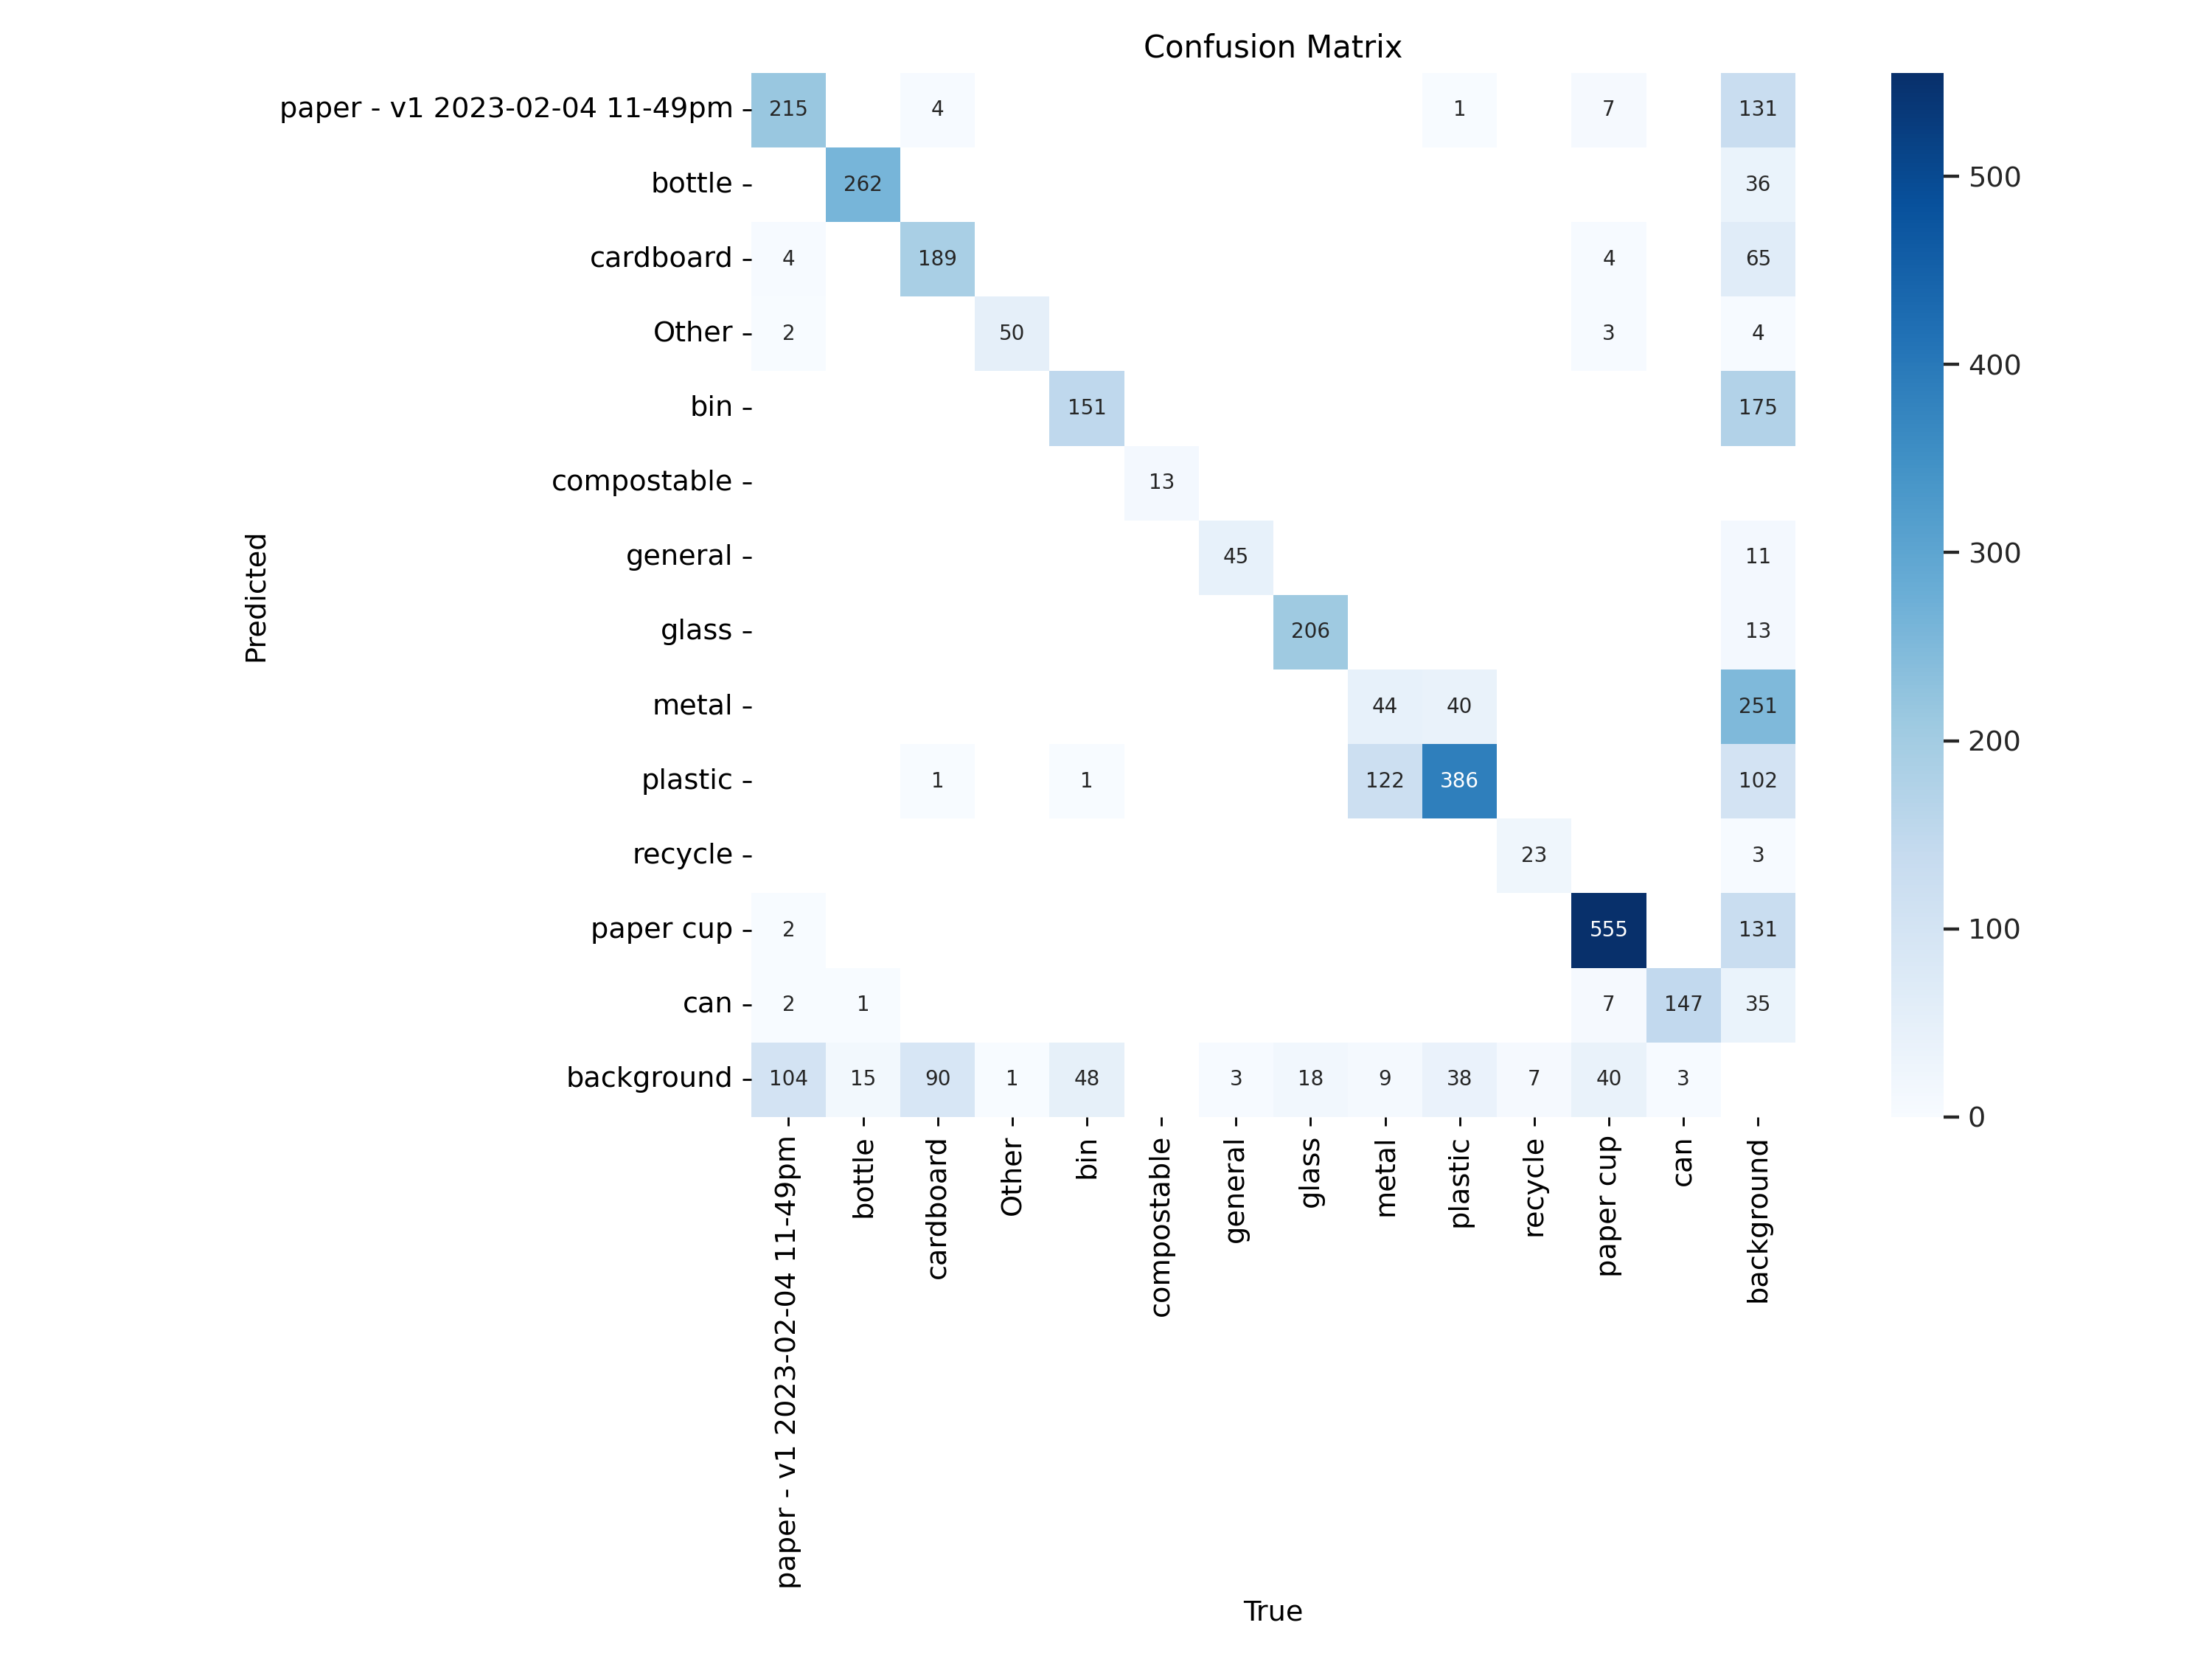

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


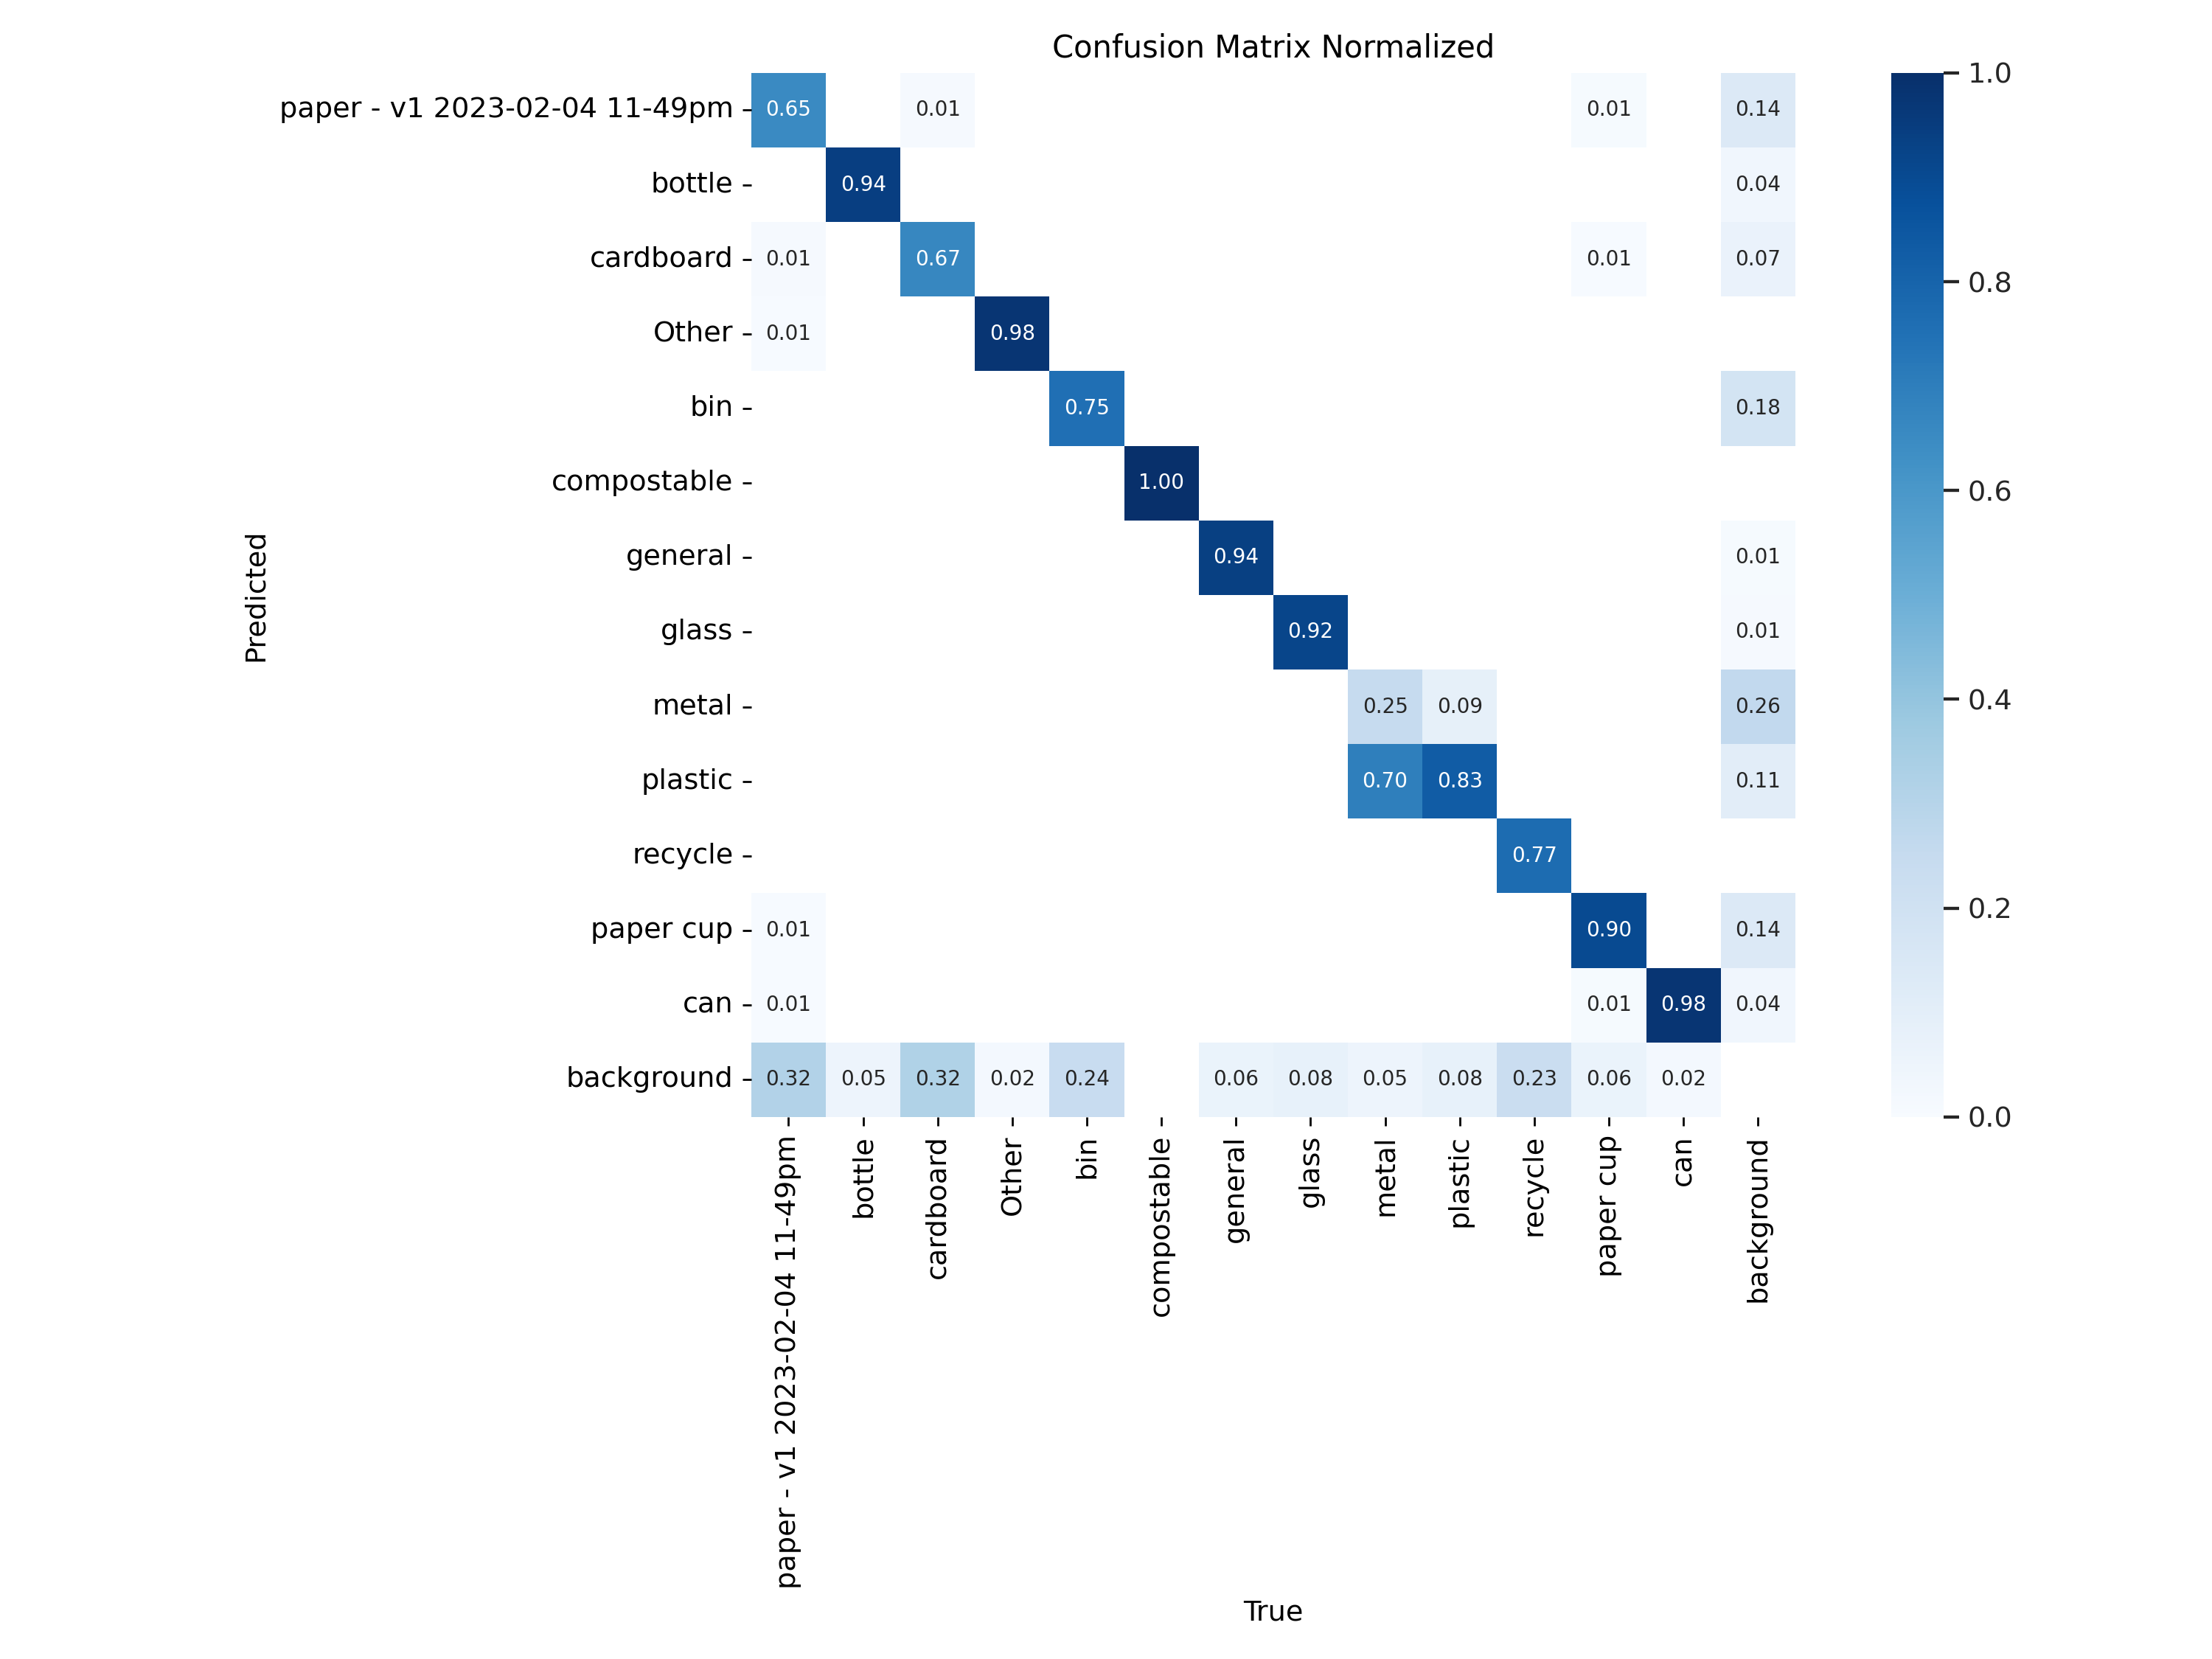

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=600)